In [1]:
from pandas import DataFrame
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
import plotly.graph_objects as go




# Part I. Data preprocessing

### Read CSV which was saved from scraping process

In [2]:
hotel = pd.read_csv('TripAd-U.S_Hotels.csv', '\t', index_col=0) # read csv file and save it in hotel

### Overview of the dataset

In [3]:
length = len(hotel)
hotel.head(10)

,Hotel,Location,Code,Cost,Score,Rating,Walk.Grade,No. Restaurants,No. Attractions
0,Baccarat Hotel & Residences New York,New York City,NY,"$1,045",4.5,Excellent,100.0,451.0,119.0
1,Crowne Plaza Times Square Manhattan,New York City,NY,$229,4.0,Very good,100.0,551.0,246.0
2,Park Lane Hotel,New York City,NY,$180,4.0,Very good,100.0,263.0,90.0
3,"Martinique New York on Broadway, Curio Collect...",New York City,NY,$191,4.0,Very good,100.0,547.0,104.0
4,Arlo NoMad,NaN,NY,$215,4.5,Excellent,100.0,511.0,89.0
5,Hilton Garden Inn New York Times Square South,New York City,NY,$280,4.5,Excellent,100.0,406.0,94.0
6,Arlo SoHo,New York City,NY,$179,4.5,Excellent,100.0,162.0,40.0
7,The Gotham Hotel,New York City,NY,$215,4.0,Very good,100.0,452.0,141.0
8,"The Lexington Hotel, Autograph Collection",New York City,NY,$189,4.0,Very good,100.0,482.0,67.0
9,Hilton Times Square,New York City,NY,$215,4.5,Excellent,100.0,597.0,236.0


In [4]:
hotel.dtypes  #check data types

Hotel               object
Location            object
Code                object
Cost                object
Score              float64
Rating              object
Walk.Grade         float64
No. Restaurants    float64
No. Attractions    float64
dtype: object

### There are two main things to preprocess with the data:

There are some missing values in the location. I will reasign the name of the location for those missing values.<br>
Bacsically, my hotels was grouped by location when I scrape them so I can asign the missing location for a hotel by naming the location as the hotel above/below. <br><br>
The "Cost" column is not float type. Its values contain dollar sign and comma (e.g. $1,234). I need to remove the dollar signs and the commas and convert the values in "Cost" from object to float.




In [5]:
#need to change the "Cost" column data type to float
hotel["Cost"] = hotel["Cost"].str.replace(',', '') #remove comma
hotel["Cost"] = hotel["Cost"].str.replace('$', '') #remove dollar sign
hotel["Cost"] = hotel["Cost"].fillna("0").astype(int) #convert NaN to 0 and change "Cost" to float type
hotel["Cost"].replace(0, np.nan, inplace=True) #reasign NaN into "Cost"

In [6]:
hotel.dtypes #see data types now

Hotel               object
Location            object
Code                object
Cost               float64
Score              float64
Rating              object
Walk.Grade         float64
No. Restaurants    float64
No. Attractions    float64
dtype: object

In [7]:
hotel.head(10)

,Hotel,Location,Code,Cost,Score,Rating,Walk.Grade,No. Restaurants,No. Attractions
0,Baccarat Hotel & Residences New York,New York City,NY,1045.0,4.5,Excellent,100.0,451.0,119.0
1,Crowne Plaza Times Square Manhattan,New York City,NY,229.0,4.0,Very good,100.0,551.0,246.0
2,Park Lane Hotel,New York City,NY,180.0,4.0,Very good,100.0,263.0,90.0
3,"Martinique New York on Broadway, Curio Collect...",New York City,NY,191.0,4.0,Very good,100.0,547.0,104.0
4,Arlo NoMad,NaN,NY,215.0,4.5,Excellent,100.0,511.0,89.0
5,Hilton Garden Inn New York Times Square South,New York City,NY,280.0,4.5,Excellent,100.0,406.0,94.0
6,Arlo SoHo,New York City,NY,179.0,4.5,Excellent,100.0,162.0,40.0
7,The Gotham Hotel,New York City,NY,215.0,4.0,Very good,100.0,452.0,141.0
8,"The Lexington Hotel, Autograph Collection",New York City,NY,189.0,4.0,Very good,100.0,482.0,67.0
9,Hilton Times Square,New York City,NY,215.0,4.5,Excellent,100.0,597.0,236.0


In [8]:
#there are some NaN in location. I need to assign the missing locations.
#Basically, my dataset is arranged by location. 
#Therefore, I can know the missing location by looking at the above/below row.
#I can set the missing locations by naming them as their above/below rows.

for i in range (1,length):
    try:
        np.isnan(hotel.ix[i,"Location"]) #try if the row i contains missing location
        hotel.ix[i,"Location"] = hotel.ix[i-1,"Location"] #if True, name it as the above row.
    except:
        pass
    
    
   

In [9]:
hotel.head(10)

,Hotel,Location,Code,Cost,Score,Rating,Walk.Grade,No. Restaurants,No. Attractions
0,Baccarat Hotel & Residences New York,New York City,NY,1045.0,4.5,Excellent,100.0,451.0,119.0
1,Crowne Plaza Times Square Manhattan,New York City,NY,229.0,4.0,Very good,100.0,551.0,246.0
2,Park Lane Hotel,New York City,NY,180.0,4.0,Very good,100.0,263.0,90.0
3,"Martinique New York on Broadway, Curio Collect...",New York City,NY,191.0,4.0,Very good,100.0,547.0,104.0
4,Arlo NoMad,New York City,NY,215.0,4.5,Excellent,100.0,511.0,89.0
5,Hilton Garden Inn New York Times Square South,New York City,NY,280.0,4.5,Excellent,100.0,406.0,94.0
6,Arlo SoHo,New York City,NY,179.0,4.5,Excellent,100.0,162.0,40.0
7,The Gotham Hotel,New York City,NY,215.0,4.0,Very good,100.0,452.0,141.0
8,"The Lexington Hotel, Autograph Collection",New York City,NY,189.0,4.0,Very good,100.0,482.0,67.0
9,Hilton Times Square,New York City,NY,215.0,4.5,Excellent,100.0,597.0,236.0


### Strange Values

There is a hotel with strangle price per night. It costs more than $200,000 per night. At first, I checked the hotel name and look it in TripAdvisor and there is nothing wront with the price. However, one day later I saw that they update the price. Therefore, I changed the price according to their updates because the previous price is extremely significant.

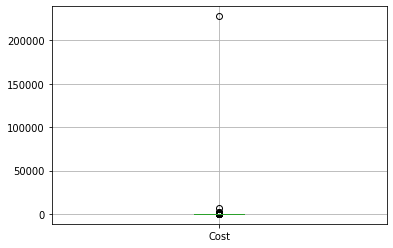

In [10]:
hotel.boxplot("Cost") # There is one hotel with more than $200,000

In [11]:
hotel[hotel.Cost == hotel["Cost"].max()] #this is the hotel that has a strange price. 

,Hotel,Location,Code,Cost,Score,Rating,Walk.Grade,No. Restaurants,No. Attractions
895,Hotel Croydon,Miami Beach,FL,227772.0,4.5,Excellent,79.0,22.0,4.0


In [12]:
#The next day, I looked the TripAdvisor website, they updated the price to $149. One day after, it became $80.
#I will edit the price in my dataset to $80.

hotel.loc[hotel.Cost == hotel["Cost"].max(), "Cost"] = 80 #update the price to 80

hotel[hotel.Hotel == "Hotel Croydon"] #check the hotel 





,Hotel,Location,Code,Cost,Score,Rating,Walk.Grade,No. Restaurants,No. Attractions
895,Hotel Croydon,Miami Beach,FL,80.0,4.5,Excellent,79.0,22.0,4.0


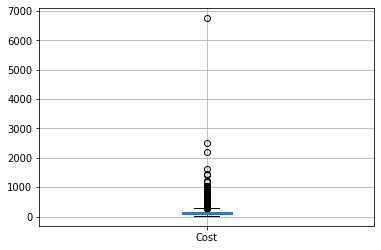

In [13]:
hotel.boxplot("Cost") #there is one hotel with nearly $7,000 per night.

In [14]:
hotel[hotel.Cost == hotel["Cost"].max()]

#I checked the hotel and the price has not been changed a lot in 5 days. Seems that this price has nothing wrong.
#The link for this hotel:
#https://www.tripadvisor.com/Hotel_Review-g34543-d14969413-Reviews-Origin_at_Seahaven-Panama_City_Beach_Florida.html

,Hotel,Location,Code,Cost,Score,Rating,Walk.Grade,No. Restaurants,No. Attractions
7690,Origin at Seahaven,Panama City Beach,FL,6749.0,4.0,Very good,62.0,26.0,5.0


In [15]:
# For the next parts, I do some preparations below

In [16]:
#calculate cost average by locations and save them into a dataframe
cost_avg = hotel.groupby("Location", as_index=True)["Cost"].mean()
cost_avg = pd.DataFrame({"Location":cost_avg.index, "Cost":cost_avg.values})

#calculate score average by locations and save them into a dataframe
score_avg = hotel.groupby("Location", as_index=True)["Score"].mean()
score_avg = pd.DataFrame({"Location":score_avg.index, "Score":score_avg.values})

#calculate walk.grade average by locations and save them into a dataframe
wlk_avg = hotel.groupby("Location", as_index=True)["Walk.Grade"].mean()
wlk_avg = pd.DataFrame({"Location":wlk_avg.index, "Walk.Grade":wlk_avg.values})

#calculate cost average by locations and save them into a dataframe
rest_avg = hotel.groupby("Location", as_index=True)["No. Restaurants"].mean()
rest_avg = pd.DataFrame({"Location":rest_avg.index, "No. Restaurants":rest_avg.values})

#calculate cost average by locations and save them into a dataframe
atr_avg = hotel.groupby("Location", as_index=True)["No. Attractions"].mean()
atr_avg = pd.DataFrame({"Location":atr_avg.index, "No. Attractions":atr_avg.values})


In [17]:
#calculate cost average by states and save them into a dataframe
cost_avg0 = hotel.groupby("Code", as_index=True)["Cost"].mean()
cost_avg0 = pd.DataFrame({"Code":cost_avg0.index, "Cost":cost_avg0.values})

#calculate score average by states and save them into a dataframe
score_avg0= hotel.groupby("Code", as_index=True)["Score"].mean()
score_avg0 = pd.DataFrame({"Code":score_avg0.index, "Score":score_avg0.values})

#calculate walk.grade average by states and save them into a dataframe
wlk_avg0 = hotel.groupby("Code", as_index=True)["Walk.Grade"].mean()
wlk_avg0 = pd.DataFrame({"Code":wlk_avg0.index, "Walk.Grade":wlk_avg0.values})

#calculate cost average by states and save them into a dataframe
rest_avg0 = hotel.groupby("Code", as_index=True)["No. Restaurants"].mean()
rest_avg0= pd.DataFrame({"Code":rest_avg0.index, "No. Restaurants":rest_avg0.values})

#calculate cost average by states and save them into a dataframe
atr_avg0 = hotel.groupby("Code", as_index=True)["No. Attractions"].mean()
atr_avg0 = pd.DataFrame({"Code":atr_avg0.index, "No. Attractions":atr_avg0.values})

In [18]:
#merge all the dataframes above by Location
avg_list = [cost_avg, score_avg, wlk_avg, rest_avg, atr_avg] 
avg = reduce(lambda left,right: pd.merge(left,right,on="Location"), avg_list)
#avg.head(10)

In [19]:
#merge all the dataframes above by Code
avg_list0 = [cost_avg0, score_avg0, wlk_avg0, rest_avg0, atr_avg0] 
avg0 = reduce(lambda left,right: pd.merge(left,right,on="Code"), avg_list0)
#avg0.head(10)

# Part II. Overview

## 1. U.S Hotel Quality

In [20]:
hotel["Score"].describe() #describe Rating

count    11582.000000
mean         3.912666
std          0.797842
min          0.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Score, dtype: float64

The average score is around 3.93, pretty high number. It shows that most of U.S hotels reach the Very good quality

In [21]:
count_rating = hotel.groupby("Rating").size()
count_rating.sort_values(ascending = False, inplace = True)

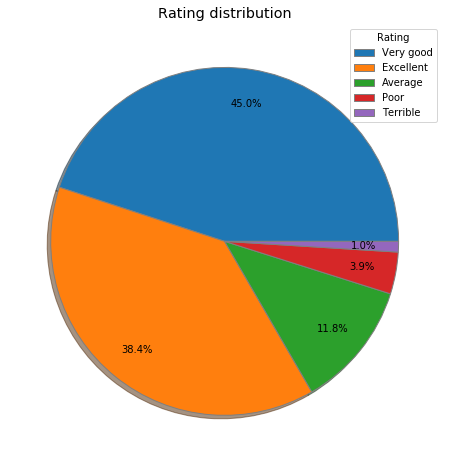

In [66]:
count_rating.plot.pie(shadow = True, 
    autopct = '%1.1f%%', pctdistance = 0.8, labels = None, radius = 1, 
    wedgeprops={"edgecolor":"grey",'linewidth': 1, 'antialiased': True}, figsize = (8,8))

plt.title('Rating distribution', fontsize = 'x-large')
plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Rating', labels = count_rating.index, loc = 'best', fontsize = 'medium')


As we see from the pie chart, the majority of U.S hotels are rated Very good and Excellent.

Text(0.5, 1.0, 'Top 10 States')

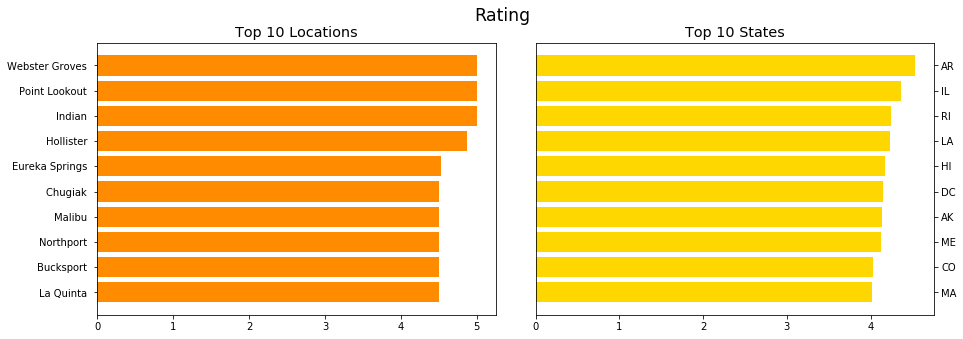

In [23]:
#plot top 20 locations and top 20 states by rating

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Rating", fontsize = "xx-large")

score_avg.sort_values(by="Score",ascending=True, inplace=True)
score_avg.dropna(inplace=True)
ax1.barh(data=score_avg, y=score_avg[-10:].Location, width=score_avg[-10:]["Score"], color ="darkorange")
ax1.set_title("Top 10 Locations", size="x-large")


score_avg0.sort_values(by="Score",ascending=True, inplace=True)
score_avg0.dropna(inplace=True)
ax2.barh(y=score_avg0[-10:].Code, width=score_avg0[-10:]["Score"], color ="gold")
ax2.set_title("Top 10 States", size="x-large")

## 2. Price

In [24]:
hotel["Cost"].describe() #describe Price


count    8588.000000
mean      140.785748
std       132.011559
min        20.000000
25%        79.000000
50%       110.000000
75%       165.000000
max      6749.000000
Name: Cost, dtype: float64

The average price is nearly $141, which is a affordable for most visitors to the United States.

Text(0.5, 1.0, 'Lowest Average Price')

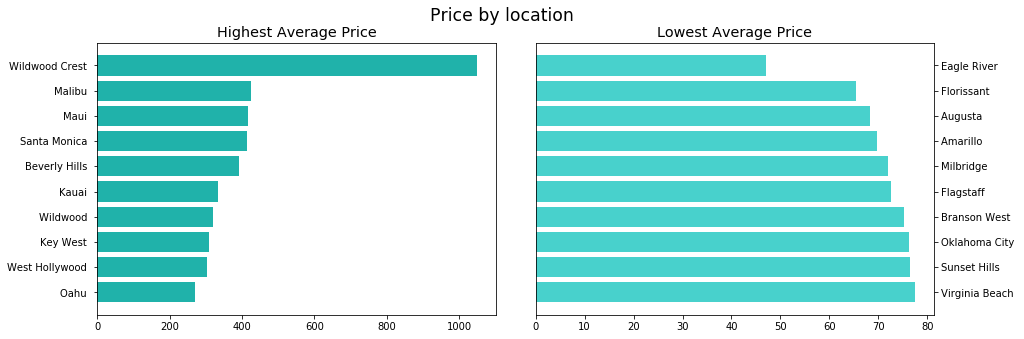

In [25]:
cost_avg.dropna(inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Price by location", fontsize ="xx-large")

cost_avg.sort_values(by="Cost",ascending=True, inplace=True) #locations with highest average price
ax1.barh(y=cost_avg[-10:].Location, width=cost_avg[-10:]["Cost"], color ="lightseagreen")
ax1.set_title("Highest Average Price", size ='x-large')

cost_avg.sort_values(by="Cost",ascending=False, inplace=True) #locations with lowest average price
ax2.barh(y=cost_avg[-10:].Location, width=cost_avg[-10:]["Cost"], color ="mediumturquoise")
ax2.set_title("Lowest Average Price", size = 'x-large')


Text(0.5, 1.0, 'Lowest Average Price')

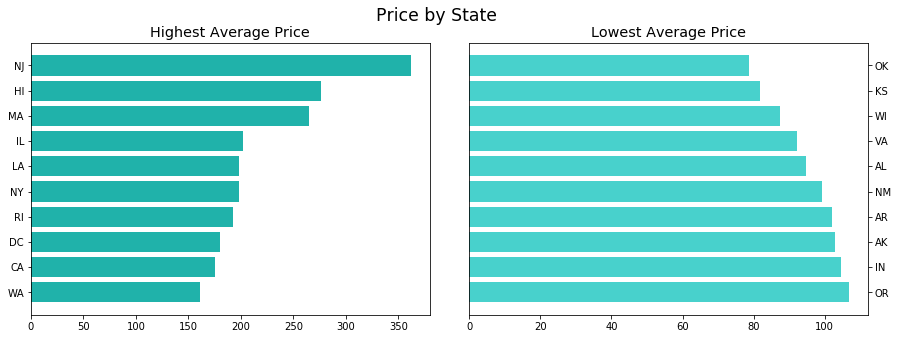

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Price by State", fontsize = "xx-large")

cost_avg0.sort_values(by="Cost",ascending=True, inplace=True) #states with higest price
ax1.barh(y=cost_avg0[-10:].Code, width=cost_avg0[-10:]["Cost"], color ="lightseagreen")
ax1.set_title("Highest Average Price", size ='x-large')

cost_avg0.sort_values(by="Cost",ascending=False, inplace=True) #states with lowest price
ax2.barh(y=cost_avg0[-10:].Code, width=cost_avg0[-10:]["Cost"], color ="mediumturquoise")
ax2.set_title("Lowest Average Price", size = 'x-large')


## 3. Price and Rating

### Categories of price per night

Since we do not have any specific price range, I will divide it by my own criteria after reviewing some hotel websites about the price.

* Budget: <= 150 <br>
* Moderate: more than 150 - 350 <br>
* Expensive: more than 350 - 500 <br>
* Very expensive: more than 500 - less than 1000 <br>
* Luxury: 1000+.
<br>

P/s: All prices are U.S dollars.

In [27]:
#Now, I will subset the hotel into different groups of price
hotel_budget = hotel[hotel.Cost <= 150]
hotel_moderate = hotel[(hotel.Cost > 150) & (hotel.Cost <= 350)]
hotel_expensive = hotel[(hotel.Cost > 350) & (hotel.Cost <= 500)]
hotel_very_expensive = hotel[(hotel.Cost > 500) & (hotel.Cost < 1000)]
hotel_luxury = hotel[hotel.Cost >= 1000]

In [28]:
#set the order of Rating (Excellent, Very good, ...) for better look at boxplots
order = hotel["Rating"].drop_duplicates()
order.index=range(len(order))
order.dropna(inplace=True)


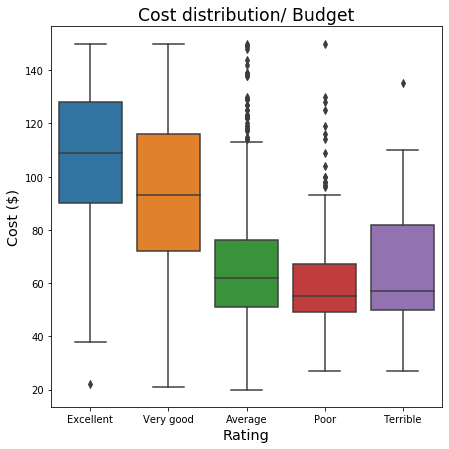

In [68]:
plt.figure(figsize=(7,7))
sns.boxplot(data=hotel_budget,x="Rating", y = "Cost", order=order)
plt.title("Cost distribution/ Budget", fontsize ="xx-large")
plt.xlabel("Rating", fontsize ="x-large")
plt.ylabel("Cost ($)", fontsize = "x-large")
plt.suptitle("")


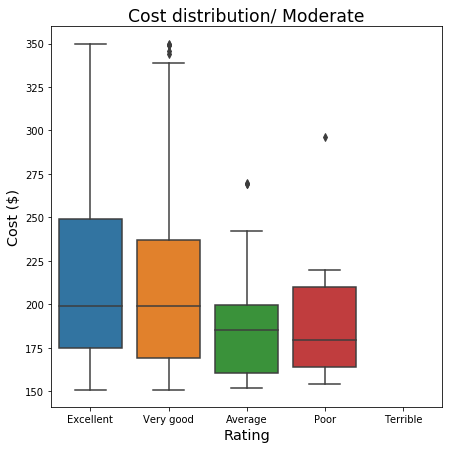

In [69]:
plt.figure(figsize=(7,7))
sns.boxplot(data=hotel_moderate,x="Rating", y = "Cost",order=order)
plt.title("Cost distribution/ Moderate", fontsize ="xx-large")
plt.xlabel("Rating", fontsize ="x-large")
plt.ylabel("Cost ($)", fontsize = "x-large")
plt.suptitle("")


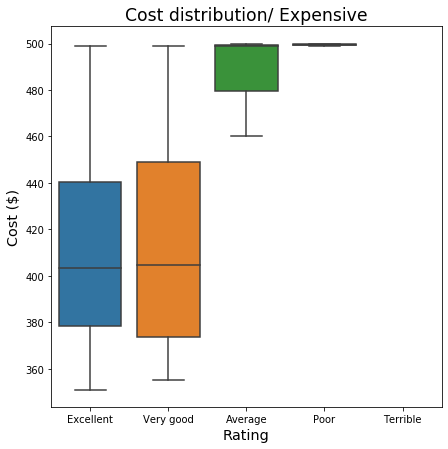

In [70]:
plt.figure(figsize=(7,7))
sns.boxplot(data=hotel_expensive,x="Rating", y = "Cost",order=order)
plt.title("Cost distribution/ Expensive", fontsize ="xx-large")
plt.xlabel("Rating", fontsize ="x-large")
plt.ylabel("Cost ($)", fontsize = "x-large")
plt.suptitle("")



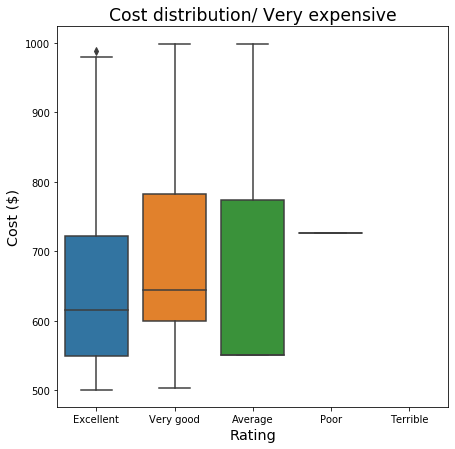

In [71]:
plt.figure(figsize=(7,7))
sns.boxplot(data=hotel_very_expensive,x="Rating", y = "Cost",order=order)
plt.title("Cost distribution/ Very expensive", fontsize ="xx-large")
plt.xlabel("Rating", fontsize ="x-large")
plt.ylabel("Cost ($)", fontsize = "x-large")
plt.suptitle("")



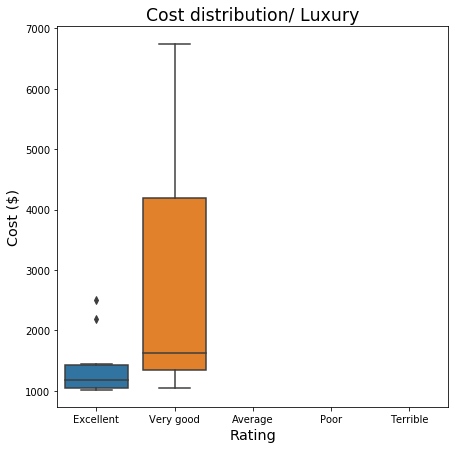

In [72]:
plt.figure(figsize=(7,7))
sns.boxplot(data=hotel_luxury,x="Rating", y = "Cost",order=order)
plt.title("Cost distribution/ Luxury", fontsize ="xx-large")
plt.xlabel("Rating", fontsize ="x-large")
plt.ylabel("Cost ($)", fontsize = "x-large")
plt.suptitle("")


### Findings: 

* In all price ranges, excellent hotels tend to concentrate on the lower price side (the boxplots show a right-skew distribution).
* In general, when the price range increases, the rating of the hotels is better. We see terrible hotels in budget range, but in moderate range, there is no terrible hotels. In the expensive and very expensive ranges, there are only 1-2 poor hotels; and in the luxury range, all the hotels are rated excellent or very good.


## 4. Walk Grade

Walk Grade show how convenient for visitors to move to attractions, restaurants, shops,... nearby the hotel.

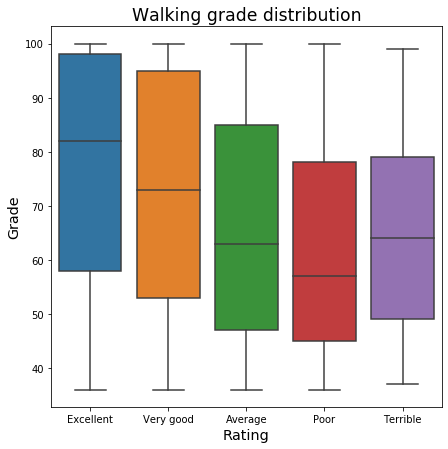

In [73]:
plt.figure(figsize=(7,7))
sns.boxplot(data=hotel,x="Rating", y = "Walk.Grade",order=order)
plt.title("Walking grade distribution", fontsize ="xx-large")
plt.xlabel("Rating", fontsize ="x-large")
plt.ylabel("Grade", fontsize = "x-large")
plt.suptitle("")



Overall, excellent hotels tend to get very high grade for walking.

# 4. Nearby services 

## Walking

Text(0.5, 1.0, 'State')

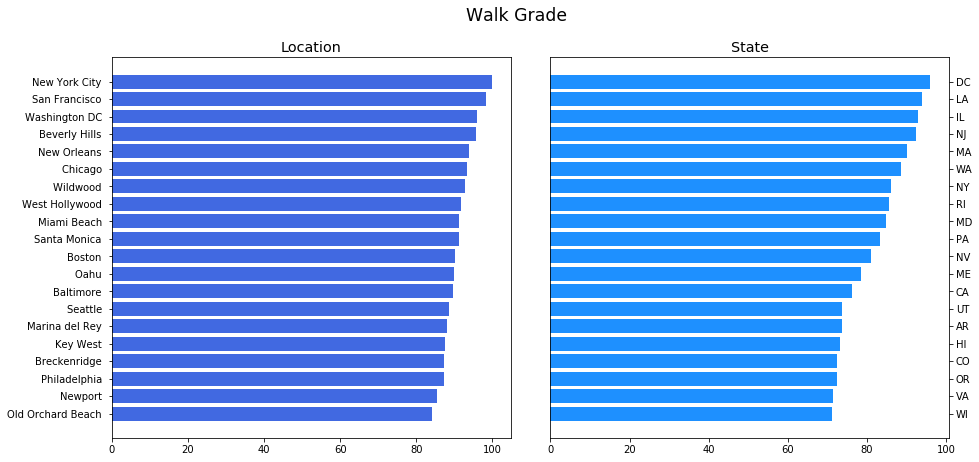

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Walk Grade", fontsize = "xx-large")

wlk_avg.sort_values(by="Walk.Grade",ascending=True, inplace=True)
wlk_avg.dropna(inplace=True)
ax1.barh(data=wlk_avg, y=wlk_avg[-20:].Location, width=wlk_avg[-20:]["Walk.Grade"], color ="royalblue")
ax1.set_title("Location", size="x-large")


wlk_avg0.sort_values(by="Walk.Grade",ascending=True, inplace=True)
wlk_avg0.dropna(inplace=True)
ax2.barh(y=wlk_avg0[-20:].Code, width=wlk_avg0[-20:]["Walk.Grade"], color ="dodgerblue")
ax2.set_title("State", size="x-large")

## Restaurant

Text(0.5, 1.0, 'State')

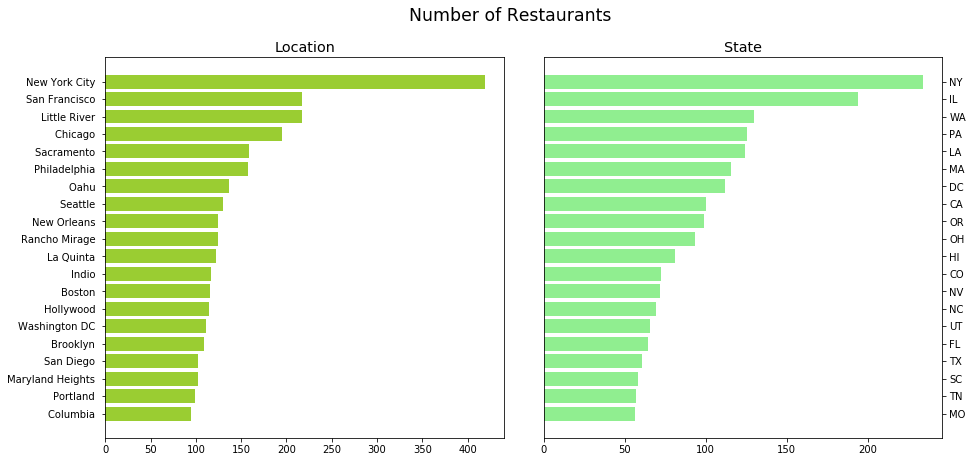

In [36]:
#top 20 locations and top 20 states by the average number of restaurants nearby a hotel

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Number of Restaurants", fontsize = "xx-large")

rest_avg.sort_values(by="No. Restaurants",ascending=True, inplace=True)
rest_avg.dropna(inplace=True)
ax1.barh(y=rest_avg[-20:].Location, width=rest_avg[-20:]["No. Restaurants"], color ="yellowgreen")
ax1.set_title("Location", size="x-large")

rest_avg0.sort_values(by="No. Restaurants",ascending=True, inplace=True)
rest_avg0.dropna(inplace=True)
ax2.barh(y=rest_avg0[-20:].Code, width=rest_avg0[-20:]["No. Restaurants"], color ="lightgreen")
ax2.set_title("State", size="x-large")

## Attraction

Text(0.5, 1.0, 'State')

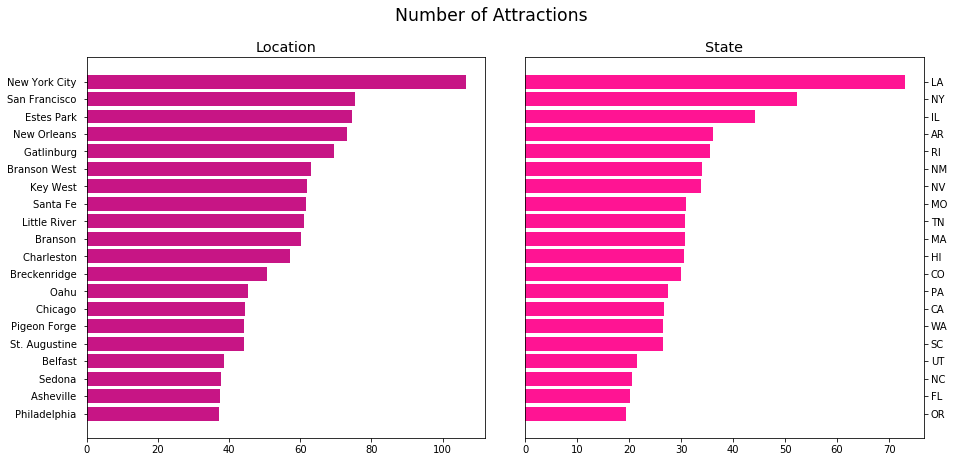

In [37]:
#top 20 locations and top 20 states by the average number of attractions nearby a hotel

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Number of Attractions", fontsize = "xx-large")

atr_avg.sort_values(by="No. Attractions",ascending=True, inplace=True)
atr_avg.dropna(inplace=True)
ax1.barh(y=atr_avg[-20:].Location, width=atr_avg[-20:]["No. Attractions"], color ="mediumvioletred")
ax1.set_title("Location", size="x-large")

atr_avg0.sort_values(by="No. Attractions",ascending=True, inplace=True)
atr_avg0.dropna(inplace=True)
ax2.barh(y=atr_avg0[-20:].Code, width=atr_avg0[-20:]["No. Attractions"], color ="deeppink")
ax2.set_title("State", size="x-large")

### Findings:
* D.C has the highest grade for walking.
* New York City has the highest average number of restaurants and attractions neary a hotel. The city's state NY is also at the top of the state list.

# Part III. Analysis

# 1. Best Qualtity Hotels & Best Price Hotels

* Best quality hotels contain all hotels rated Excellent and Very good.
* Best price hotels contain all hotels with price per night not more than $350.

In [38]:
best_hotel = hotel[(hotel.Rating == "Excellent") | (hotel.Rating == "Very good")] #best quality
reasonable = pd.concat((hotel_budget,hotel_moderate)) #best price


In [39]:
count1 = best_hotel.groupby("Location").size()
count1 = pd.DataFrame({"Location":count1.index, "No. Hotels":count1.values})
count1.sort_values(by="No. Hotels",ascending=True, inplace=True)

count2 = reasonable.groupby("Location").size()
count2 = pd.DataFrame({"Location":count2.index, "No. Hotels":count2.values})
count2.sort_values(by="No. Hotels",ascending=True, inplace=True)

count10 = best_hotel.groupby("Code").size()
count10 = pd.DataFrame({"Code":count10.index, "No. Hotels":count10.values})
count10.sort_values(by="No. Hotels",ascending=True, inplace=True)

count20 = reasonable.groupby("Code").size()
count20 = pd.DataFrame({"Code":count20.index, "No. Hotels":count20.values})
count20.sort_values(by="No. Hotels",ascending=True, inplace=True)


### Locations with most best quality and best price hotels

Text(0.5, 1.0, '20 Locations with most affordable hotels')

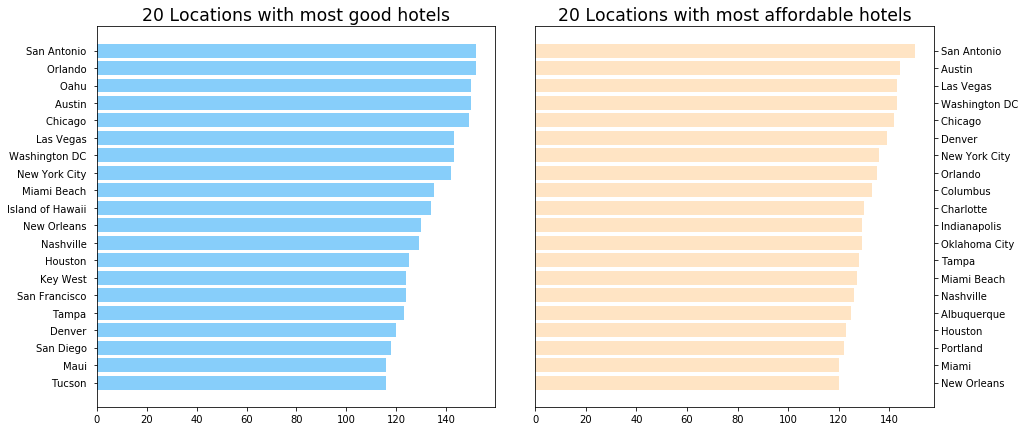

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
ax1.barh(y=count1[-20:].Location, width=count1[-20:]["No. Hotels"], color ="lightskyblue")
ax1.set_title("20 Locations with most good hotels", size ='xx-large')
ax2.barh(y=count2[-20:].Location, width=count2[-20:]["No. Hotels"], color ="bisque")
ax2.set_title("20 Locations with most affordable hotels", size = 'xx-large')




### States with most best quality and best price hotels

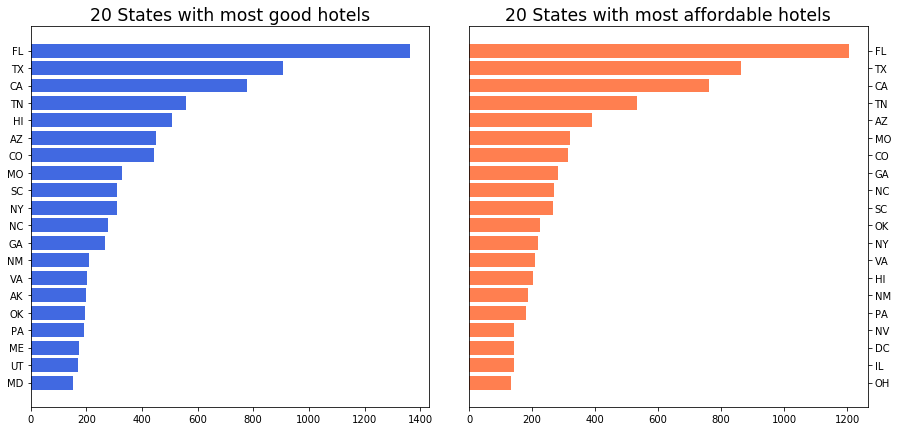

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,7))
ax2.yaxis.tick_right()
fig.subplots_adjust(wspace = 0.1)
ax1.barh(y=count10[-20:].Code, width=count10[-20:]["No. Hotels"], color ="royalblue")
ax1.set_title("20 States with most good hotels", size ='xx-large')
ax2.barh(y=count20[-20:].Code, width=count20[-20:]["No. Hotels"], color ="coral")
ax2.set_title("20 States with most affordable hotels", size = 'xx-large')



In [42]:
#define a function to help to plot faster. I should do this at the start, but I realize that I need it too late.

def barhplot(df1,df2,group,name):
    set1 = df1.groupby(group, as_index=True)[name].mean()
    set1 = pd.DataFrame({group:set1.index, name:set1.values})
    
    set2 = df2.groupby(group, as_index=True)[name].mean()
    set2 = pd.DataFrame({group:set2.index, name:set2.values})
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,5))
    ax2.yaxis.tick_right()
    fig.subplots_adjust(wspace = 0.1)
    fig.suptitle(name, fontsize ='xx-large')

    set1.sort_values(by=name,ascending=True, inplace=True)
    set1.dropna(inplace=True)
    ax1.barh(y=set1[-10:][group], width=set1[-10:][name], color ="dodgerblue")
    ax1.set_title("Good Rating", size = "x-large")

    set2.sort_values(by=name,ascending=True, inplace=True)
    set2.dropna(inplace=True)
    ax2.barh(y=set2[-10:][group], width=set2[-10:][name], color ="tomato")
    ax2.set_title("Reasonable Price", size = "x-large")


## Nearby Services 

### Location

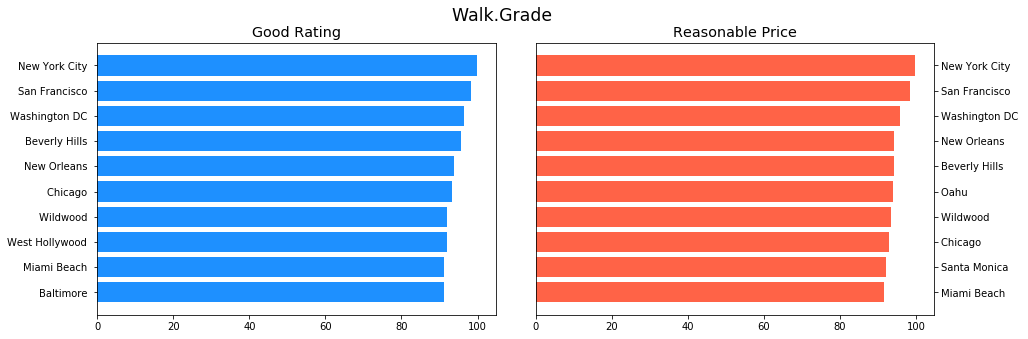

In [43]:
barhplot(best_hotel,reasonable,"Location","Walk.Grade")

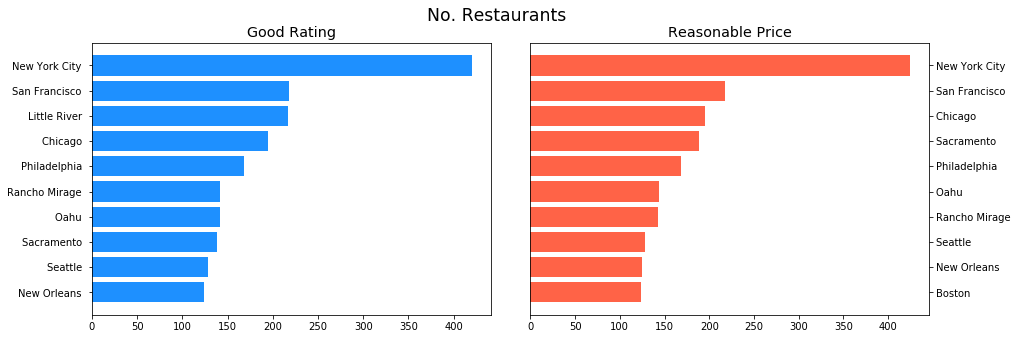

In [44]:
barhplot(best_hotel,reasonable,"Location","No. Restaurants")

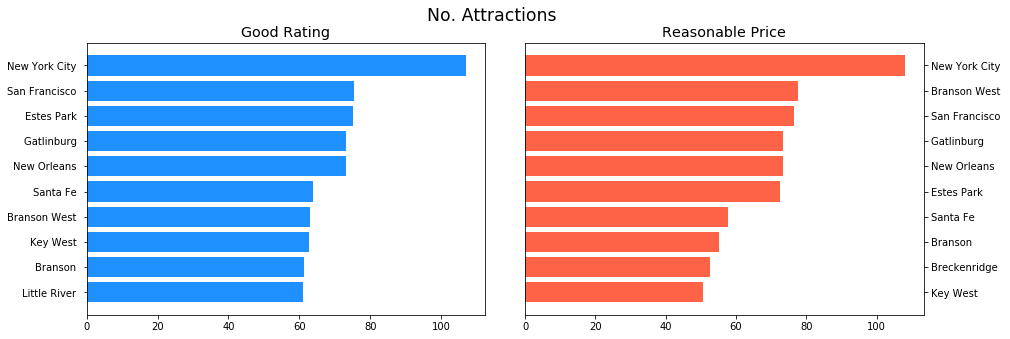

In [45]:
barhplot(best_hotel,reasonable,"Location","No. Attractions")

### State

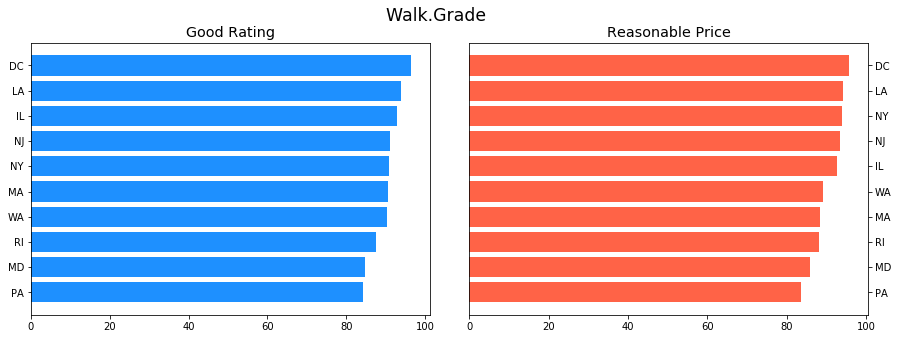

In [46]:
barhplot(best_hotel,reasonable,"Code","Walk.Grade")

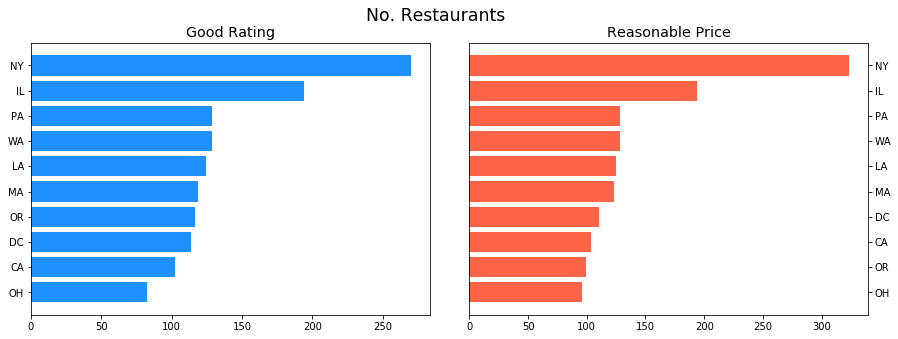

In [47]:
barhplot(best_hotel,reasonable,"Code","No. Restaurants")

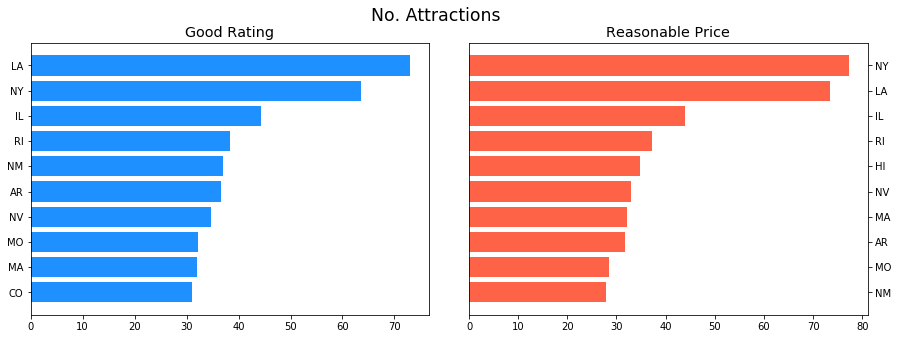

In [48]:
barhplot(best_hotel,reasonable,"Code","No. Attractions")

# 2. Best Value Hotels

I define best value hotel by rating and price per night:
* Hotel has budget or moderate price: price per night is not more than 350 U.S dollars
* Hotel was rated Excellent or Very good.

In summary, best value hotel = best price hotel + best quality hotel.

In [49]:
#Here is my best value hotel dataframe
best_value = hotel[(hotel.Cost <= 350) & ((hotel.Rating == "Very good") | (hotel.Rating == "Excellent"))]

In [50]:
# Some pre-calculations before analysis. 
# Information about price and rating and score will be excluded since they are not necessary for next analysis.
# I've already select the best price and best quality hotels for my next analysis.

In [51]:
state_count = best_value.groupby("Code").size() #count number of best value hotels in each state
state_count = pd.DataFrame({"Code":state_count.index, "No. Hotels":state_count.values})
state_count.sort_values(by="No. Hotels",ascending=True, inplace=True)
top = state_count["Code"][-20:].tolist() #save codes of top 20 states into a list


wlkmean = best_value.groupby("Code", as_index=True)["Walk.Grade"].mean() #walk grade average by state
wlkmean = pd.DataFrame({"Code":wlkmean.index, "Walk.Grade":wlkmean.values})


restmean = best_value.groupby("Code", as_index=True)["No. Restaurants"].mean() #average no. of restaurants
restmean = pd.DataFrame({"Code":restmean.index, "No. Restaurants":restmean.values})


atrmean = best_value.groupby("Code", as_index=True)["No. Attractions"].mean() #average no. of attractions
atrmean = pd.DataFrame({"Code":atrmean.index, "No. Attractions":atrmean.values})

#merge all the dataframes above by Code
mean = [wlkmean, restmean, atrmean] 
best_value_code = reduce(lambda left,right: pd.merge(left,right,on="Code"), mean)
#best_value_code.head(10)

top_state = best_value_code[best_value_code.Code.isin(top)] # save top 20 states by no. hotels into another df

In [52]:
#I conduct the same process with Location

loc_count = best_value.groupby("Location").size() 
loc_count = pd.DataFrame({"Location":loc_count.index, "No. Hotels":loc_count.values})
loc_count.sort_values(by="No. Hotels",ascending=True, inplace=True)
top1 = loc_count["Location"][-20:].tolist() #save names of top 20 locations into a list


wlkmean1 = best_value.groupby("Location", as_index=True)["Walk.Grade"].mean()
wlkmean1 = pd.DataFrame({"Location":wlkmean1.index, "Walk.Grade":wlkmean1.values})


restmean1 = best_value.groupby("Location", as_index=True)["No. Restaurants"].mean()
restmean1 = pd.DataFrame({"Location":restmean1.index, "No. Restaurants":restmean1.values})


atrmean1 = best_value.groupby("Location", as_index=True)["No. Attractions"].mean()
atrmean1 = pd.DataFrame({"Location":atrmean1.index, "No. Attractions":atrmean1.values})

#merge all the dataframes above by Location
mean1 = [wlkmean1, restmean1, atrmean1] 
best_value_loc = reduce(lambda left,right: pd.merge(left,right,on="Location"), mean1)
#best_value_loc.head(10)

top_loc = best_value_loc[best_value_loc.Location.isin(top1)] # save top 20 locations by no. hotels into another df

## Top States

<BarContainer object of 20 artists>

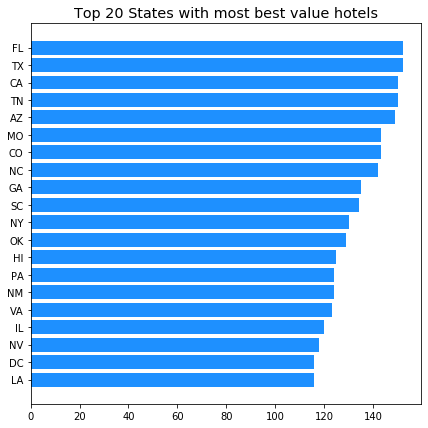

In [53]:
plt.figure(figsize = (7,7))
plt.title("Top 20 States with most best value hotels", fontsize="x-large")
plt.barh(data=state_count, y=state_count[-20:].Code, width=count1[-20:]["No. Hotels"], color ="dodgerblue")

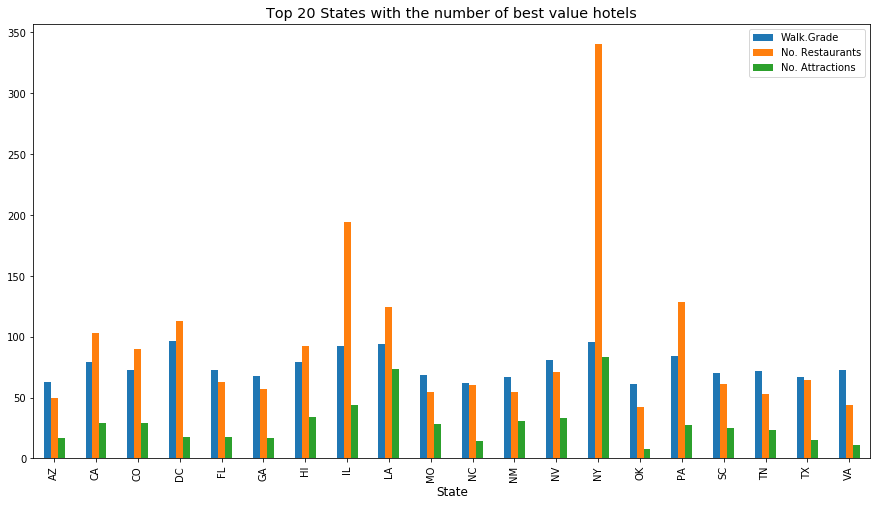

In [80]:
top_state.plot(figsize = (15,8), kind="bar", x="Code")
plt.xlabel("State", fontsize ="large")
plt.title("Top 20 States with the number of best value hotels", fontsize = "x-large")




<BarContainer object of 20 artists>

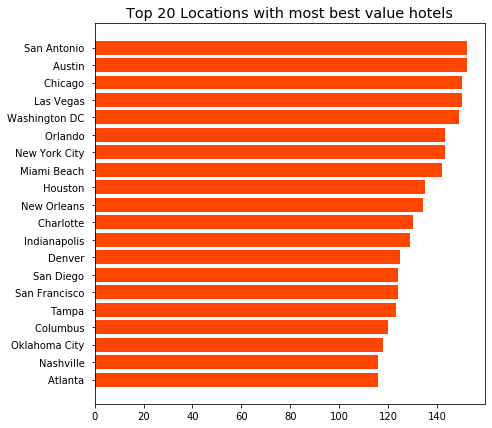

In [55]:
plt.figure(figsize = (7,7))
plt.title("Top 20 Locations with most best value hotels", fontsize="x-large")
plt.barh(data=loc_count, y=loc_count[-20:].Location, width=count1[-20:]["No. Hotels"], color ="orangered")

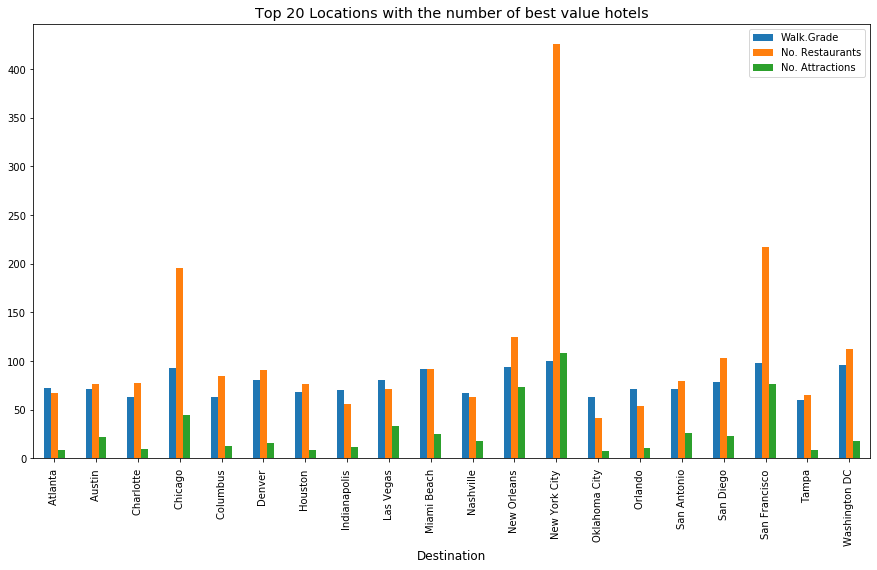

In [78]:
top_loc.plot(figsize = (15,8), kind="bar", x="Location")
plt.xlabel("Destination", fontsize = "large")
plt.title("Top 20 Locations with the number of best value hotels", fontsize = "x-large")


# Part IV. Hotel Service Choropleth Map

I use plotly to plot the maps. I learned the codes from https://plot.ly/python/choropleth-maps/

## All hotels in the data

In [81]:
fig = go.Figure(data=go.Choropleth(
    locations=avg0["Code"], 
    z = avg0["Score"].astype(float),  
    locationmode = 'USA-states', 
    colorscale = 'portland',
    colorbar_title = "Score",
    marker_line_color="white"))

fig.update_layout(
    title_text = 'Average Hotel Rating in the United States',
    geo_scope='usa')
fig.show()

<Figure size 432x288 with 0 Axes>

Top 5 states with highest average rating scores are Illinois (IL), Rhode Island (IR), Arkansas (AR), Los Angeles (LA) and New York (NY).

In [58]:
fig = go.Figure(data=go.Choropleth(
    locations=avg0["Code"], 
    z = avg0["No. Restaurants"].astype(float),  
    locationmode = 'USA-states', 
    colorscale = 'greens',
    colorbar_title = "No. of Restaurants",
    marker_line_color="white"))

fig.update_layout(
    title_text = 'Average number of Restaurants nearby a hotel',
    geo_scope='usa')
fig.show()

New York (NY) has the higest number of restaurants near a hotel.<br>
Illinois (IL), Los Angeles (LA) and Washington (WA) come next in the list.

In [59]:
fig = go.Figure(data=go.Choropleth(
    locations=avg0["Code"], 
    z = avg0["No. Attractions"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'blues',
    colorbar_title = "No. of Attractions",
    marker_line_color="white"
))

fig.update_layout(
    title_text = 'Average number of Attractions nearby a hotel',
    geo_scope='usa')
fig.show()

New York (NY) and Los Angeles (LA) have the highest numbers of attractions around a hotel.

## Best value hotels

In [64]:
fig = go.Figure(data=go.Choropleth(
    locations=state_count["Code"], 
    z = state_count["No. Hotels"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'plotly3',
    colorbar_title = "Number",
    marker_line_color="white"
))

fig.update_layout(
    title_text = "Number of Best value Hotels",
    geo_scope='usa')
fig.show()

Florida (FL), Texas (TX) and California (CA) have the higest numbers of best value hotels.

In [61]:
fig = go.Figure(data=go.Choropleth(
    locations=best_value_code["Code"], 
    z = best_value_code["No. Restaurants"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'greens',
    colorbar_title = "No. of Restaurants",
    marker_line_color="white"
))

fig.update_layout(
    title_text = "Average number of Restaurants/ Best value Hotels",
    geo_scope='usa')
fig.show()

In [62]:
fig = go.Figure(data=go.Choropleth(
    locations=best_value_code["Code"], 
    z = best_value_code["No. Attractions"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'blues',
    colorbar_title = "No. of Attractions",
    marker_line_color="white"
))

fig.update_layout(
    title_text = 'Average number of Attractions/ Best value Hotels',
    geo_scope='usa')
fig.show()

In [63]:
fig = go.Figure(data=go.Choropleth(
    locations=avg0["Code"], 
    z = avg0["Walk.Grade"].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'fall',
    colorbar_title = "Grade",
    marker_line_color="white"
))

fig.update_layout(
    title_text = 'Average Walk Grade/ Best value Hotels',
    geo_scope='usa')
fig.show()

For the best value hotels data, the state with highest average numbers of restaurants and attractions around a hotel is New York (NY). The result is the same when considering all hotels data.<br>
New York (NY), Los Angeles (LA) and Illinois (IL) seem to be the best places if visitors want to wander and explore the stores, restaurants, attractions ... in the United States.

# Part V. Conclusion

My project only reflects a part of U.S hotel industry. The dataset is scraped from around 12,300 hotels in the top 100 popular locations in the United States. In addition, the results show the places with the most sightseeing options (restaurants, attractions), but can not point out the best destination to visit.<br>

Overall, the hotel industry in the United States is growing very well. The majority of hotels (around 83%) in the country are rated as Excellent or Very good. The price is also reasonable. It costs average 140 USD per night to stay at a hotel.
<br>
New York, Los Angeles and Illinois seem to have the various options for their tourists. They have a lot of restaurants, attractions nearby a hotel. Furthermore, the prices to stay are affordable since there are many best value hotels in these states.   
<br>
If visitors love walking around the hotel and experience the shopping malls and places of interest, New York, Los Angeles and Illinois are also perfect selections. These states have very high grades in walking. 

<br>
It is noteworthy that D.C has the higest grade for walking and is among the top states of best value hotels. Washington D.C also has a high walking grade and decent number of best value hotels. Although there are modest numbers of restaurants and attractions, it is worth to consider visiting D.C.


